In [97]:
import pandas as pd
import pybaseball
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [13]:
data = pybaseball.statcast(start_dt='2023-03-30', end_dt='2023-04-30')
data2 = pybaseball.statcast(start_dt='2023-05-01', end_dt='2023-05-31')
data3 = pybaseball.statcast(start_dt='2023-06-01', end_dt='2023-06-30')
data4 = pybaseball.statcast(start_dt='2023-07-01', end_dt='2023-07-31')
data5 = pybaseball.statcast(start_dt='2023-08-01', end_dt='2023-08-31')
data6 = pybaseball.statcast(start_dt='2023-09-01', end_dt='2023-09-30')
data7 = pybaseball.statcast(start_dt='2023-10-01', end_dt='2023-10-20')

This is a large query, it may take a moment to complete


100%|██████████| 32/32 [00:30<00:00,  1.04it/s]


This is a large query, it may take a moment to complete


100%|██████████| 31/31 [00:28<00:00,  1.09it/s]


This is a large query, it may take a moment to complete


100%|██████████| 30/30 [00:30<00:00,  1.02s/it]


This is a large query, it may take a moment to complete


100%|██████████| 31/31 [00:25<00:00,  1.21it/s]


This is a large query, it may take a moment to complete


100%|██████████| 31/31 [00:27<00:00,  1.13it/s]


This is a large query, it may take a moment to complete


100%|██████████| 30/30 [00:40<00:00,  1.36s/it]


This is a large query, it may take a moment to complete


100%|██████████| 20/20 [00:11<00:00,  1.77it/s]


In [14]:
data.head()


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2458,SI,2023-04-30,91.0,2.68,5.09,"Bernardino, Brennan",665926,657514,field_out,hit_into_play,...,7,1,7,1,7,Strategic,Standard,137,0.0,-0.09
2494,SI,2023-04-30,90.4,2.75,5.06,"Bernardino, Brennan",665926,657514,NaN,called_strike,...,7,1,7,1,7,Strategic,Standard,133,0.0,-0.031
2567,SI,2023-04-30,89.4,2.94,5.08,"Bernardino, Brennan",665926,657514,NaN,ball,...,7,1,7,1,7,Strategic,Standard,135,0.0,0.021
2646,SI,2023-04-30,90.1,3.06,4.87,"Bernardino, Brennan",665926,657514,NaN,swinging_strike,...,7,1,7,1,7,Strategic,Standard,128,0.0,-0.022
2800,SI,2023-04-30,90.3,2.94,5.03,"Bernardino, Brennan",665926,657514,NaN,ball,...,7,1,7,1,7,Standard,Standard,133,0.0,0.016


In [15]:
data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [16]:
df = pd.concat([data, data2, data3, data4, data5, data6, data7])

In [17]:
df.to_csv('2023_MLB_Seaspm.csv')

In [18]:
# Creating new columns 'total_runs' and 'half_inning'
df['total_runs'] = df['away_score'] + df['home_score']
df['half_inning'] = df['game_pk'].astype(str) + '_' + \
                                df['inning'].astype(str) + '_' + \
                                df['inning_topbot'].astype(str)

In [19]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,total_runs,half_inning
2458,SI,2023-04-30,91.0,2.68,5.09,"Bernardino, Brennan",665926,657514,field_out,hit_into_play,...,7,1,7,Strategic,Standard,137,0.0,-0.09,8,718370_9_Top
2494,SI,2023-04-30,90.4,2.75,5.06,"Bernardino, Brennan",665926,657514,NaN,called_strike,...,7,1,7,Strategic,Standard,133,0.0,-0.031,8,718370_9_Top
2567,SI,2023-04-30,89.4,2.94,5.08,"Bernardino, Brennan",665926,657514,NaN,ball,...,7,1,7,Strategic,Standard,135,0.0,0.021,8,718370_9_Top
2646,SI,2023-04-30,90.1,3.06,4.87,"Bernardino, Brennan",665926,657514,NaN,swinging_strike,...,7,1,7,Strategic,Standard,128,0.0,-0.022,8,718370_9_Top
2800,SI,2023-04-30,90.3,2.94,5.03,"Bernardino, Brennan",665926,657514,NaN,ball,...,7,1,7,Standard,Standard,133,0.0,0.016,8,718370_9_Top


In [41]:
# Grouping by 'half_inning' and calculating 'max_runs_in_half_inning' and 'roi_score'
grouped_data = df.groupby('half_inning').apply(
    lambda x: x.assign(
        max_runs_in_half_inning=x['total_runs'].max(),
        roi_score=x['total_runs'].max() - x['total_runs']
    )
).reset_index(drop=True)

In [48]:
print(grouped_data['description'].value_counts())

description
ball                       243446
foul                       129398
hit_into_play              125641
called_strike              119250
swinging_strike             77250
blocked_ball                16157
foul_tip                     7349
swinging_strike_blocked      4386
hit_by_pitch                 2132
foul_bunt                    1012
missed_bunt                   185
pitchout                       46
bunt_foul_tip                  16
unknown_strike                  1
Name: count, dtype: int64


In [49]:
print(grouped_data['events'].value_counts())

events
field_out                       73386
strikeout                       42209
single                          26321
walk                            15469
double                           8310
home_run                         5945
force_out                        3632
grounded_into_double_play        3494
hit_by_pitch                     2132
sac_fly                          1216
field_error                      1078
triple                            716
sac_bunt                          436
double_play                       397
fielders_choice                   380
fielders_choice_out               293
caught_stealing_2b                195
strikeout_double_play             102
catcher_interf                     98
sac_fly_double_play                24
other_out                          21
caught_stealing_home               12
pickoff_1b                         12
caught_stealing_3b                 10
pickoff_caught_stealing_2b          9
wild_pitch                          6
picko

In [50]:
grouped_data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [64]:
print(grouped_data['outs_when_up'].value_counts())

outs_when_up
0    249725
1    240230
2    236314
Name: count, dtype: Int64


In [51]:
print(grouped_data['balls'].value_counts())

balls
0    329380
1    214973
2    122131
3     59781
4         4
Name: count, dtype: Int64


In [52]:
print(grouped_data['strikes'].value_counts())

strikes
0    288191
1    221304
2    216774
Name: count, dtype: Int64


In [53]:
states = grouped_data.copy()


In [57]:
states.loc[states['balls'] == 4, 'balls'] = 3

In [58]:
print(states['balls'].value_counts())

balls
0    329380
1    214973
2    122131
3     59785
Name: count, dtype: Int64


In [59]:
states['count_state'] = states['balls'].astype(str) + '&' + \
                      states['strikes'].astype(str)

In [60]:
states['count_state'].value_counts()

count_state
0&0    185696
0&1     94257
1&1     73429
1&0     71054
1&2     70490
2&2     60234
0&2     49427
2&1     37862
3&2     36623
2&0     24035
3&1     15756
3&0      7406
Name: count, dtype: int64

In [61]:
states.loc[~states['on_3b'].isna(), 'on_3b'] = 1
states.loc[states['on_3b'].isna(), 'on_3b'] = 0
states.loc[~states['on_2b'].isna(), 'on_2b'] = 1
states.loc[states['on_2b'].isna(), 'on_2b'] = 0
states.loc[~states['on_1b'].isna(), 'on_1b'] = 1
states.loc[states['on_1b'].isna(), 'on_1b'] = 0

In [62]:
print(states['on_3b'].value_counts())

on_3b
0    656097
1     70172
Name: count, dtype: Int64


In [63]:
states['on_3b'].head()

0    0
1    0
2    0
3    0
4    0
Name: on_3b, dtype: Int64

In [68]:
states['runner_state'] = states['on_3b'].astype(str) + \
                            states['on_2b'].astype(str) + \
                            states['on_1b'].astype(str)

In [69]:
states['state'] = states['count_state'].astype(str) + '_' + \
                    states['outs_when_up'].astype(str) + '_' + \
                    states['runner_state'].astype(str)

In [70]:
print(states['state'].value_counts())

state
0&0_0_000    45172
0&0_1_000    32700
0&0_2_000    25969
0&1_0_000    23601
1&1_0_000    18251
             ...  
3&1_0_100       55
3&0_0_110       39
3&0_0_111       30
3&0_0_101       25
3&0_0_100       23
Name: count, Length: 288, dtype: int64


In [73]:
states.groupby('state')['roi_score'].mean()

state
0&0_0_000    0.507947
0&0_0_001    0.889518
0&0_0_010    1.097601
0&0_0_011    1.431902
0&0_0_100    1.426117
               ...   
3&2_2_011    0.489758
3&2_2_100    0.317841
3&2_2_101    0.494033
3&2_2_110    0.382084
3&2_2_111    0.831658
Name: roi_score, Length: 288, dtype: Float64

In [77]:
print(states[['runner_state', 'outs_when_up', 'count_state', 'roi_score']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726269 entries, 0 to 726268
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   runner_state  726269 non-null  object
 1   outs_when_up  726269 non-null  Int64 
 2   count_state   726269 non-null  object
 3   roi_score     726269 non-null  Int64 
dtypes: Int64(2), object(2)
memory usage: 23.5+ MB
None


In [84]:
median_roi = states.groupby('state')['roi_score'].median()

In [83]:
outs_1 = states.loc[states['outs_when_up'] == 1]

In [90]:
pivot_table = pd.pivot_table(states, values='roi_score', 
                             index=['runner_state'], 
                             columns=['outs_when_up', 'count_state'], 
                             aggfunc='mean').astype(float)

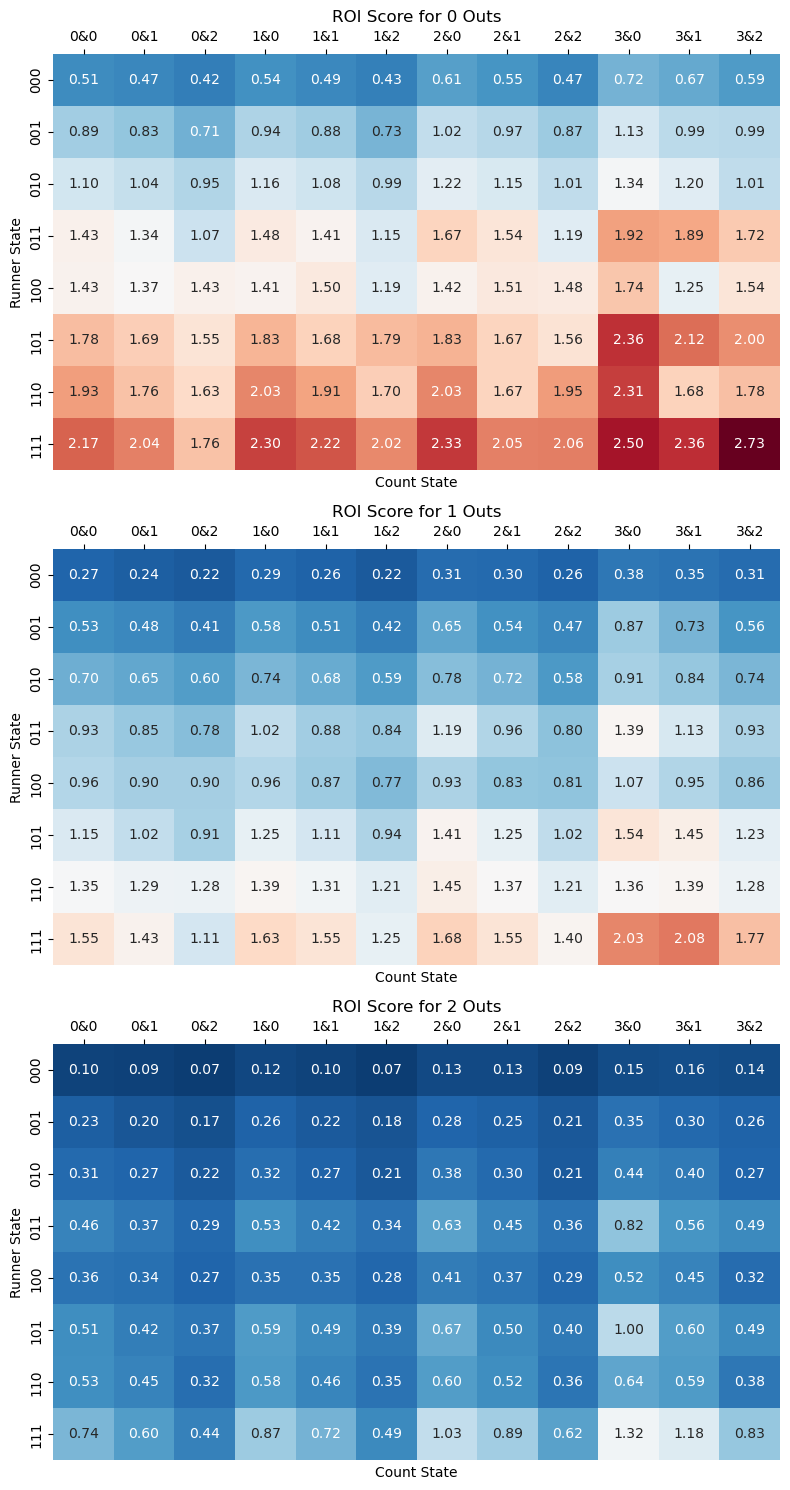

In [102]:
# Unique out states, sorted in ascending order
unique_outs = sorted(states['outs_when_up'].unique())

# Create subplots
fig, axes = plt.subplots(nrows=len(unique_outs), ncols=1, figsize=(8, 5 * len(unique_outs)))

# Ensure 'axes' is an array even if there's only one subplot
if len(unique_outs) == 1:
    axes = [axes]

for i, out_state in enumerate(unique_outs):
    ax = axes[i]
    sns.heatmap(pivot_table.xs(out_state, axis=1, level=0), annot=True, fmt=".2f", 
                cmap='RdBu_r', cbar=False, ax=ax, vmin=0, vmax=pivot_table.max().max())
    ax.xaxis.tick_top()
    ax.set_title(f'ROI Score for {out_state} Outs')
    ax.set_xlabel('Count State')
    ax.set_ylabel('Runner State')

plt.tight_layout()
plt.show()

In [79]:
print(pivot_table.head())
print(pivot_table.info())


outs_when_up         0                                                    \
count_state        0&0       0&1       0&2       1&0       1&1       1&2   
runner_state                                                               
000           0.507947  0.469768  0.417715  0.540918  0.485672  0.431387   
001           0.889518  0.828374  0.710915  0.939148  0.875162  0.730247   
010           1.097601   1.04106  0.948538  1.159271  1.076183  0.988254   
011           1.431902   1.33845  1.067381  1.483189  1.409543  1.152902   
100           1.426117  1.370629  1.428571  1.412214  1.496732  1.192857   

outs_when_up                                          ...         2            \
count_state        2&0       2&1       2&2       3&0  ...       0&2       1&0   
runner_state                                          ...                       
000           0.609721  0.554063  0.467797  0.721481  ...  0.068243  0.118721   
001           1.022047  0.971196  0.871378  1.127711  ...  0.165855